# Financial Data
## Part 1

Things to be done:
- Read https://www.degruyter.com/document/doi/10.1515/econ-2022-0073/html?lang=en&srsltid=AfmBOopx0PUyi532zVdGwVIkuRCZqeoEjSpjyeZYmuHhSF0npyPNbkjO
- **Step 3. Replication**
    - Pick one of the funds.
    - Download its data.
    - Pick 1 of the easier metrics (e.g. Correlation, or Dispersion ratio are easier than
    LASSO).
    - Implement the cross-fold validation or k-cross-fold validation.
    - Reproduce the table
    - Reproduce the graphs.

# Picking a fund and downloading the data

In [1]:
import yfinance as yf
import pandas as pd

# Download ECH stock data (or replace with IVV/EQZ)
ticker = "ECH"
ech_data = yf.download(ticker, start="2015-01-01", end="2024-01-01")

# Display the first few rows of data
ech_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ECH,ECH,ECH,ECH,ECH
Date,,,,,
2015-01-02,29.007074,29.360370,28.911389,29.308848,257000
2015-01-05,28.484493,28.948195,28.469772,28.815709,355800
2015-01-06,28.403530,28.712663,28.359367,28.521295,262300
2015-01-07,28.543371,28.727380,28.521291,28.609614,373700
2015-01-08,28.734745,28.852510,28.646419,28.778905,139900


# Calculate an Easy Metric (Correlation)

In [2]:
# Compute correlation matrix
correlation_matrix = ech_data.corr()

# Display correlation matrix
print(correlation_matrix)


Price             Close      High       Low      Open    Volume
Ticker              ECH       ECH       ECH       ECH       ECH
Price  Ticker                                                  
Close  ECH     1.000000  0.999222  0.999324  0.998301 -0.133841
High   ECH     0.999222  1.000000  0.999113  0.999294 -0.127609
Low    ECH     0.999324  0.999113  1.000000  0.999168 -0.140644
Open   ECH     0.998301  0.999294  0.999168  1.000000 -0.134156
Volume ECH    -0.133841 -0.127609 -0.140644 -0.134156  1.000000


# Implement K-Fold Cross-Validation

In [3]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare Data (Using Closing Prices)
ech_data['Next_Close'] = ech_data['Close'].shift(-1)  # Target Variable
ech_data.dropna(inplace=True)  # Drop missing values

# Define features and target variable
X = ech_data[['Open', 'High', 'Low', 'Volume']]  # Features
y = ech_data['Next_Close']  # Target

# Initialize K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# Perform Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')  # R^2 as scoring metric
print("Cross-Validation R^2 Scores:", cv_scores)
print("Average R^2 Score:", np.mean(cv_scores))


Cross-Validation R^2 Scores: [0.99341422 0.99374784 0.99289381 0.99418722 0.99360407]
Average R^2 Score: 0.9935694317250183


# Reproduce the Table

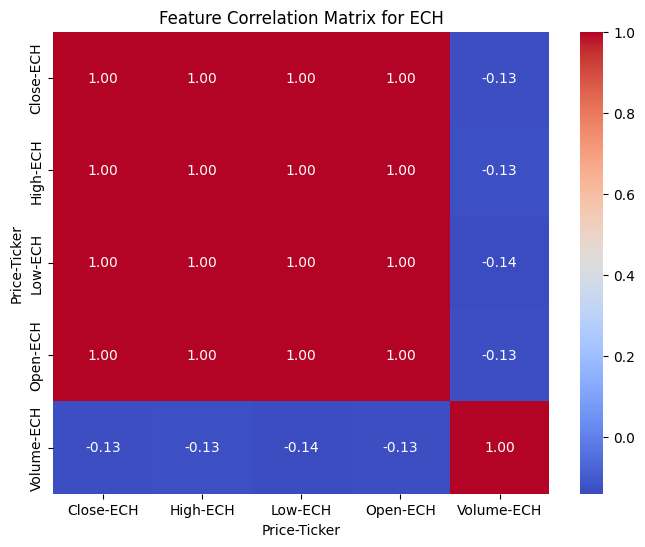

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix for ECH")
plt.show()


# Reproduce the Graphs
## Plot Closing Price Over Time

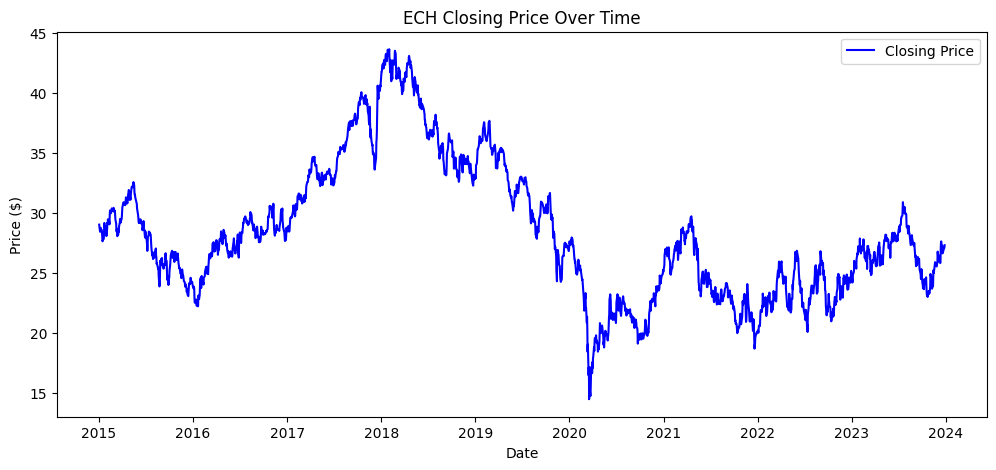

In [5]:
plt.figure(figsize=(12,5))
plt.plot(ech_data.index, ech_data['Close'], label='Closing Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("ECH Closing Price Over Time")
plt.legend()
plt.show()


## Boxplot of Daily Returns

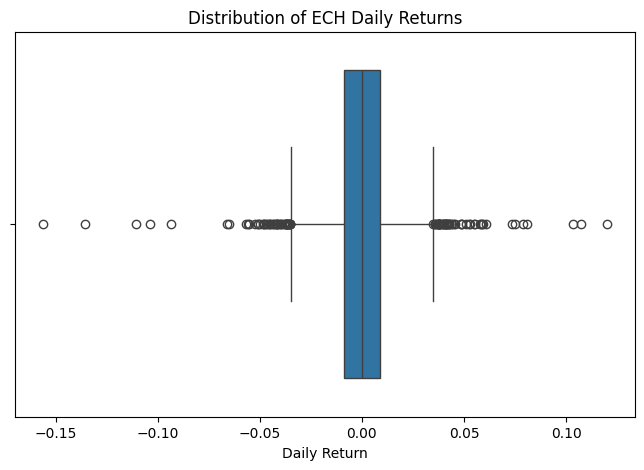

In [6]:
ech_data['Daily Return'] = ech_data['Close'].pct_change()  # Compute Daily Returns

plt.figure(figsize=(8,5))
sns.boxplot(x=ech_data['Daily Return'])
plt.title("Distribution of ECH Daily Returns")
plt.show()


# Python code to import and structure data

In [2]:
import tweepy
import pandas as pd

# Twitter API Credentials
API_KEY = 'your_api_key'
API_SECRET = 'your_api_secret'
ACCESS_TOKEN = 'your_access_token'
ACCESS_SECRET = 'your_access_secret'

# Authenticate
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Fetch tweets
query = "#StockMarket"
tweets = tweepy.Cursor(api.search_tweets, q=query, lang="en", tweet_mode='extended').items(100)

data = [[tweet.created_at, tweet.user.screen_name, tweet.full_text] for tweet in tweets]
df = pd.DataFrame(data, columns=['Timestamp', 'User', 'Tweet'])

print(df.head())

C:\Users\nmawu\PycharmProjects\Frank2\.venv\Lib\site-packages\tweepy\api.py:300: SyntaxWarning: invalid escape sequence '\['
  """home_timeline(*, count, since_id, max_id, trim_user, \
C:\Users\nmawu\PycharmProjects\Frank2\.venv\Lib\site-packages\tweepy\api.py:340: SyntaxWarning: invalid escape sequence '\['
  """mentions_timeline(*, count, since_id, max_id, trim_user, \
C:\Users\nmawu\PycharmProjects\Frank2\.venv\Lib\site-packages\tweepy\api.py:375: SyntaxWarning: invalid escape sequence '\['
  """user_timeline(*, user_id, screen_name, since_id, count, max_id, \
C:\Users\nmawu\PycharmProjects\Frank2\.venv\Lib\site-packages\tweepy\api.py:425: SyntaxWarning: invalid escape sequence '\['
  """get_favorites(*, user_id, screen_name, count, since_id, max_id, \
C:\Users\nmawu\PycharmProjects\Frank2\.venv\Lib\site-packages\tweepy\api.py:466: SyntaxWarning: invalid escape sequence '\['
  """lookup_statuses(id, *, include_entities, trim_user, map, \
C:\Users\nmawu\PycharmProjects\Frank2\.venv\L

Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Plot sentiment distribution
sns.histplot(df['Sentiment'], bins=20, kde=True)
plt.title("Sentiment Distribution of Stock Market Tweets")
plt.show()
